In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline


=====================
SVM: Weighted samples
=====================

Plot decision function of a weighted dataset, where the size of points
is proportional to its weight.

The sample weighting rescales the C parameter, which means that the classifier
puts more emphasis on getting these points right. The effect might often be
subtle.
To emphasize the effect here, we particularly weight outliers, making the
deformation of the decision boundary very visible.


In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

Dp0=pd.read_csv('./data_st/S_MPOS_27_150',delimiter=" ",header=None)
Dn0=pd.read_csv('./data_st/S_MNEG_27_150',delimiter=" ",header=None)

In [6]:
Dp0.values

array([[0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 2]])

In [18]:
Dp0s=Dp0
Dn0s=Dn0.sample(Dp0s.index.size)


D=pd.concat([Dp0s,Dn0s])
X=D.values
y=np.append(np.zeros([Dp0s.index.size,1]),np.ones([Dn0s.index.size,1]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [19]:
sample_weight_random = abs(np.random.randn(len(y_train)))

In [20]:
clf = svm.SVC(kernel='rbf',gamma='scale',class_weight='balanced',probability=True)
clf.fit(X_train,y_train,sample_weight=sample_weight_random)

acc=clf.score(X_test,y_test)
y_pred=clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)

print acc,auc

0.5081081081081081 0.5386012183692596


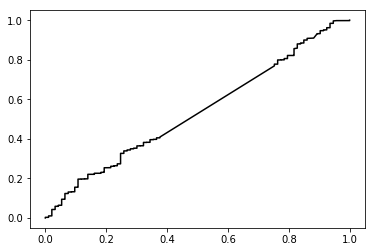

In [17]:
plt.plot(fpr,tpr,'-k')

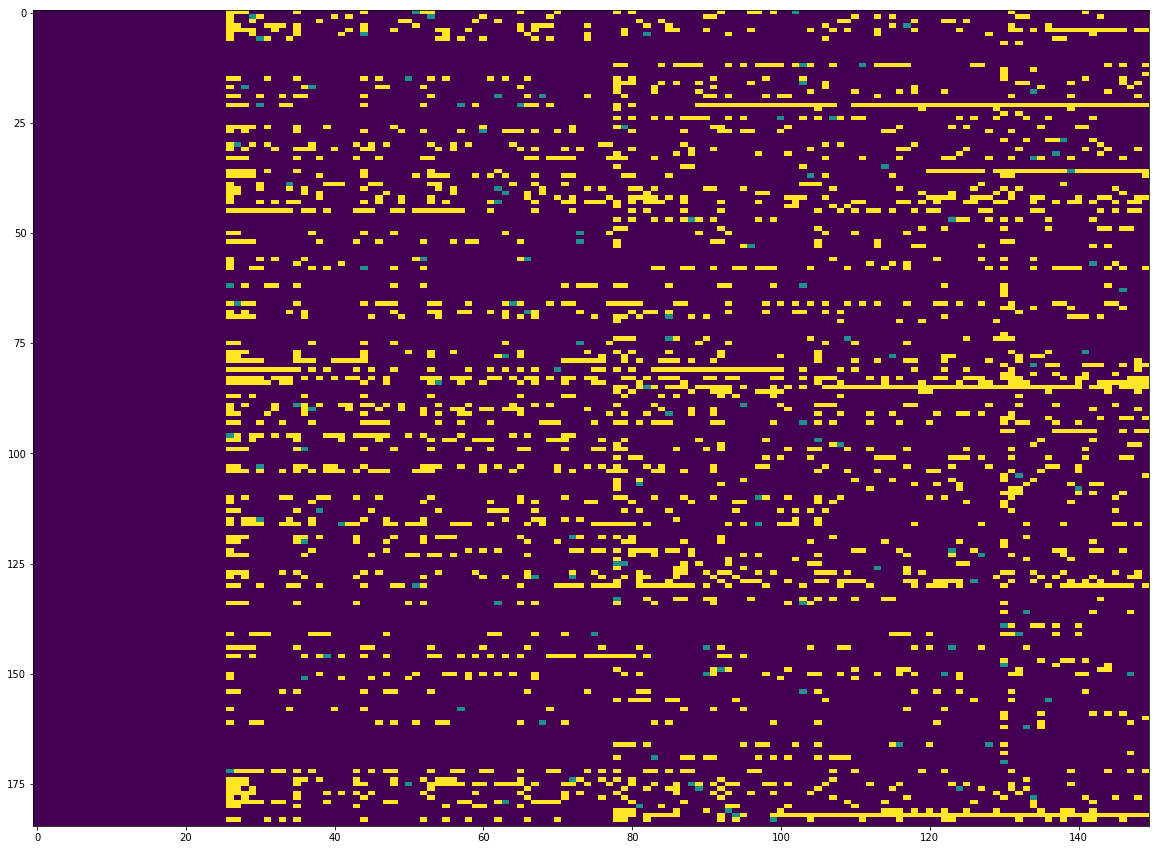

In [77]:
plt.figure(figsize=(20,15))
plt.imshow(X_train[:,0:],aspect='auto')